In [2]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


In [3]:
a = torch.ones(7)

print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [4]:
print(a.to('cpu', torch.double))

print(type(a))

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [5]:
b = a.numpy()

print(b)
print(type(b))

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [6]:
a.add_(1)

print(a)
print(type(a))
print(b)
print(type(b))

tensor([2., 2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'>
[2. 2. 2. 2. 2. 2. 2.]
<class 'numpy.ndarray'>


In [12]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
c = b.numpy()
np.add(a, 1, out = a)

print(a)
print(b)
print(c)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2. 2. 2.]


In [10]:
b = b.numpy()

np.add(b, 2, out = b)

array([4., 4., 4., 4., 4., 4., 4.])

### 자동미분 autograd


- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

TORCH.AUTOGRAD를 사용한 자동 미분 <br>
https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html

In [13]:
a = torch.randn(3, 3)
a = a * 3

print(a)
print(a.requires_grad)

tensor([[-0.0746,  5.2314, -2.2525],
        [ 6.3759,  3.6259,  6.4735],
        [ 1.9828,  2.7793,  0.5209]])
False


PyTorch를 사용하여 그래디언트 계산을 수행

- `a.requires_grad_(True)`는 `a` 텐서의 `requires_grad` 속성을 `True`로 설정하는데, 이는 `a`에 대한 그래디언트를 계산할 필요가 있다는 것을 의미. `_`를 사용한 이유는 inplace 연산을 수행하여 `a` 텐서 자체를 변경하기 때문임.

- `print(a.requires_grad)`는 `a.requires_grad`의 값을 출력하므로 `True`가 출력.

- `b = (a*a).sum()`은 `a`의 제곱을 구하고 그 합을 `b`에 할당함으로 `b`는 `a`의 제곱들의 총합을 나타냄.

- `print(b)`는 `b`의 값을 출력하므로 `b`의 계산 결과가 출력.

- `print(b.grad_fn)`은 `b`의 그래디언트 계산을 위한 함수를 출력. 이는 `b`가 어떤 계산을 통해 얻어졌는지를 나타내는데, 이 경우 `(a*a).sum()` 연산을 통해 얻어진 것을 알 수 있다.

In [16]:
a.requires_grad_(True)

print(a.requires_grad)

b = (a * a).sum()

print(b)
print(b.grad_fn)

True
tensor(140.0786, grad_fn=<SumBackward0>)


In [17]:
a = torch.ones(2, 2)

print(a)

tensor([[1., 1.],
        [1., 1.]])


In [18]:
a = torch.ones(2, 2, requires_grad = True)

print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [19]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [20]:
b = a + 2

print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [21]:
c = b ** 2

print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [22]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [23]:
print(out)

out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [24]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [25]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean = (0.5,), std = (1.0, ))])

In [26]:
#  trainset 은 모델을 훈련하기 위해 가져오는 것이기 때문에 train = True인 반면 testset은 훈련중에 사용되지 않으며 평가를 위해서만 사용됨

trainset = datasets.MNIST(root = '/content/',
                          train = True, download = True,
                          transform = mnist_transform)
testset = datasets.MNIST(root = '/content/',
                         train = False, download = True,
                         transform = mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 256862172.52it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 21147991.24it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 72022529.75it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 4699193.09it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [28]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 8, shuffle = True, num_workers = 2)

In [29]:
# 하나의 배치를 가져옴 : 내장함수인 iter을 사용하여 이터레이터를 만들고 next 함수를 사용하여
# 이터레이터의 첫번째 데이터 부터 차례대로 가져옴

images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [30]:
images[0].shape

torch.Size([1, 28, 28])

In [31]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

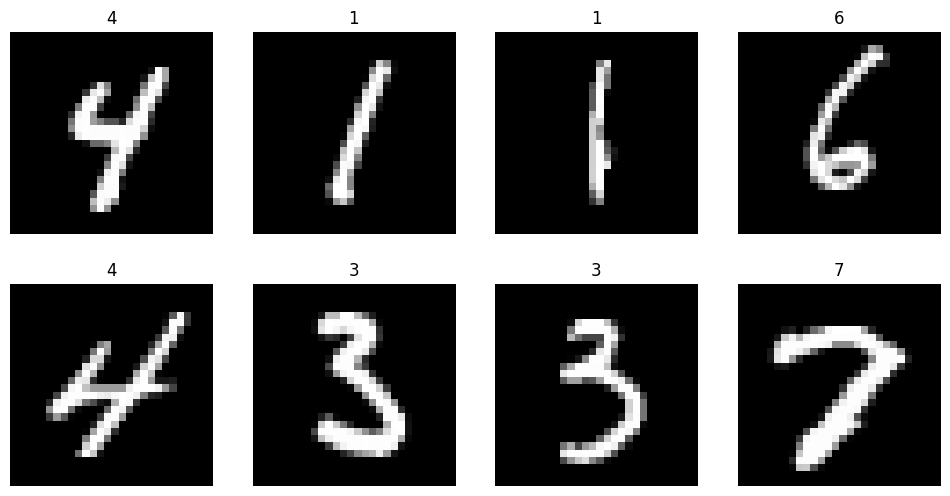

In [34]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (12, 6))
cols, rows = 4, 2

for i in range(1, cols * rows + 1) :
  sample_idx = torch.randint(len(trainset), size = (1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성

In [35]:
import torch.nn as nn

In [37]:
input = torch.randn(128, 20)

print(input)

m = nn.Linear(20, 30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-0.0914, -0.1470,  0.5018,  ...,  0.5253, -0.4040,  0.7581],
        [-0.2892,  0.6661,  0.7246,  ..., -0.4606, -0.7169, -0.1803],
        [-0.9009,  0.5961,  0.6854,  ...,  1.5512,  1.9358,  0.5371],
        ...,
        [ 1.6616,  0.8917,  0.2077,  ...,  0.6024, -0.0350,  1.1291],
        [-0.3413,  1.2131,  0.8884,  ..., -0.4717,  0.3712,  1.2431],
        [ 2.7985,  2.4707, -0.0580,  ..., -0.5296, -1.2373,  1.7150]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.2856, -0.1319,  0.4804,  ...,  0.1656,  0.0869,  0.4404],
        [-0.2981,  0.2866, -0.1580,  ..., -0.4483,  0.0129,  0.0657],
        [ 0.2065,  0.0746,  0.4105,  ...,  0.0328,  0.0866,  0.1865],
        ...,
        [ 0.1968,  0.1270,  0.8224,  ...,  1.0705, -0.6173,  0.3128],
        [ 0.1961,  0.6445,  0.7171,  ...,  0.8870, -0.9232, -0.8733],
        [-0.1366,  0.2550,  0.8071,  ..., -0.0459, -2.1661, -0.0514]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


```python
m = nn.Conv2d(16, 33, 3, stride=2)
```
이 줄은 입력 채널 개수가 16이고 출력 채널 개수가 33인 2D 합성곱 레이어를 생성합니다. 이 레이어는 커널 크기가 3x3이며 stride가 2인 것을 의미합니다. 즉, 입력 이미지에 대해 3x3 커널을 사용하여 합성곱을 수행하고, 커널을 2 픽셀씩 이동시킵니다. 이 작업은 이미지의 공간적 특징을 추출하는 데 사용됩니다.

```python
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
```
이 줄은 위와 동일한 입력과 출력 채널 개수를 가진 2D 합성곱 레이어를 생성합니다. 다만, 이번에는 커널 크기가 3x5로 다르며, stride와 padding 값도 다르게 설정되어 있습니다. stride=(2, 1)은 수평 방향으로 2 픽셀, 수직 방향으로 1 픽셀 이동하는 것을 의미합니다. padding=(4, 2)는 입력 이미지 주변에 4개의 수평 픽셀과 2개의 수직 픽셀을 추가하여 입력 이미지의 크기를 유지하는 것을 의미합니다. 이러한 매개변수 설정은 커널의 크기와 이동 방식을 더 세밀하게 제어하고, 입력 이미지 주변에 패딩을 추가하여 출력 크기를 조정하는 데 사용됩니다.

```python
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
```
마지막 줄에서는 위와 동일한 매개변수를 가지는 합성곱 레이어를 생성하되, dilation=(3, 1)으로 설정되었습니다. dilation은 커널 내부의 픽셀 간 간격을 제어하는 매개변수로, dilation 값이 1일 경우 픽셀 간의 간격이 1로 유지됩니다. 하지만 dilation 값이 1보다 큰 경우 픽셀 간 간격이 넓어지며, 이는 커널이 입력 이미지에 적용되는 영역을 넓히는 효과를 줍니다. 이를 통해 더 넓은 영역에 대한 정보를 포착할 수 있습니다.

이 코드는 합성곱 신경망을 구성할 때 커널 크기, stride, padding, dilation 등의 매개변수를 조정하여 다양한 효과와 성능을 얻을 수 있습니다. 예를 들어, 작은 커널 크기와 큰 stride를 사용하면 입력 이미지의 크기를 더 작게 줄일 수 있으며, padding을 추가하여 출력 크기를 조정할 수 있습니다. 또한 dilation을 조정하여 합성곱 레이어의 수용 영역을 확장하고 더 넓은 영역의 정보를 포착할 수도 있습니다. 이러한 기능을 통해 합성곱 신경망을 다양한 이미지 처리 작업에 적용할 수 있습니다.

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

dilation은 kernel의 한 픽셀에서 다른 픽셀 까지의 거리를 나타냅니다.

PyTorch를 사용하여 FashionMNIST 데이터셋에 대해 분류 문제를 해결하는 딥 러닝 모델을 학습
- 데이터셋 및 데이터 로더 설정: torchvision을 사용하여 FashionMNIST 훈련 세트와 테스트 세트를 로드하고 텐서로 변환합니다. 데이터 로더는 주어진 배치 크기에 따라 데이터를 로드하고, 훈련 세트의 경우 데이터를 섞습니다.

- 신경망 정의: net이라는 이름의 커스텀 CNN 모델을 정의합니다. 이 모델은 여러 개의 합성곱 레이어, 배치 정규화, 드롭아웃, 최대 풀링, 완전 연결 레이어로 구성되어 있습니다. forward 함수는 입력 텐서가 네트워크를 통과하는 방식을 정의합니다.

- 손실 함수 및 최적화기 설정: 손실 함수로 크로스 엔트로피 손실을 사용하고, 최적화기로는 Adam을 사용합니다.

- 모델 학습: 모델은 지정된 epoch 동안 훈련됩니다. 각 배치에서, 모델은 이미지를 전달하고 결과를 계산한 다음, 손실을 계산하고 역전파를 사용하여 모델의 파라미터를 업데이트합니다. 훈련 과정에서는 모델의 손실이 출력됩니다.

- 모델 평가: model.eval()을 사용하여 모델을 평가 모드로 전환한 후, 테스트 세트의 이미지를 통해 모델을 실행하고 예측을 생성합니다. 이 예측은 실제 레이블과 비교되어 모델의 정확도를 계산합니다.

In [44]:
import torch
from torch import nn
from torch.nn import functional as f
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv2d_32 = nn.Conv2d(1,32,3,padding=1)
        self.conv2d_64 = nn.Conv2d(32,64,3,padding=1)
        self.max2d     = nn.MaxPool2d(2,2)
        self.conv2d_128 = nn.Conv2d(64,128,3,padding=1)
        self.conv2d_256 = nn.Conv2d(128,256,3, stride = 2,padding=1)
        self.linear1    = nn.Linear(3*3*256, 256)
        self.linear2    = nn.Linear(256,64)
        self.linear3    = nn.Linear(64,10)
        self.batch2d1     = nn.BatchNorm2d(64)
        self.batch2d2    = nn.BatchNorm2d(256)
        self.batch1d     = nn.BatchNorm1d(64)
        self.drop      = nn.Dropout(p=0.3)
        self.flat      = nn.Flatten()

    def forward(self,x):
            x = x.view(-1,1,28,28)
            x = f.relu(self.conv2d_32(x))
            x = f.relu(self.conv2d_64(x))
            x = self.batch2d1(x)
            x = f.relu(self.max2d(x))
            x = self.drop(x)

            x = f.relu(self.conv2d_128(x))
            x = f.relu(self.conv2d_256(x))
            x = self.batch2d2(x)
            x = f.relu(self.max2d(x))
            x = self.drop(x)

            x = self.flat(x)
            x = f.relu(self.linear1(x))
            x = self.drop(x)
            x = f.relu(self.linear2(x))
            x = self.drop(x)
            x = self.batch1d(x)
            x = f.log_softmax(self.linear3(x), dim=1)
            return(x)

model = net().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/10], Step [100/600], Loss: 0.6746
Epoch [1/10], Step [200/600], Loss: 0.5485
Epoch [1/10], Step [300/600], Loss: 0.5921
Epoch [1/10], Step [400/600], Loss: 0.5271
Epoch [1/10], Step [500/600], Loss: 0.3268
Epoch [1/10], Step [600/600], Loss: 0.3164
Epoch [2/10], Step [100/600], Loss: 0.4383
Epoch [2/10], Step [200/600], Loss: 0.4401
Epoch [2/10], Step [300/600], Loss: 0.3614
Epoch [2/10], Step [400/600], Loss: 0.2892
Epoch [2/10], Step [500/600], Loss: 0.3559
Epoch [2/10], Step [600/600], Loss: 0.2635
Epoch [3/10], Step [100/600], Loss: 0.4257
Epoch [3/10], Step [200/600], Loss: 0.1886
Epoch [3/10], Step [300/600], Loss: 0.3633
Epoch [3/10], Step [400/600], Loss: 0.2844
Epoch [3/10], Step [500/600], Loss: 0.2929
Epoch [3/10], Step [600/600], Loss: 0.2907
Epoch [4/10], Step [100/600], Loss: 0.3332
Epoch [4/10], Step [200/600], Loss: 0.3283
Epoch [4/10], Step [300/600], Loss: 0.1509
Epoch [4/10], Step [400/600], Loss: 0.3184
Epoch [4/10], Step [500/600], Loss: 0.3272
Epoch [4/10